In [1]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from suaBibSignal import *
import peakutils
import math
from scipy.signal import resample

In [2]:
# O audio escolhido tem sampleRate de 4800, o código abaixo muda isso para 44100

class AudioProcessor:
    @staticmethod
    def modify_sample_rate(input_filename, output_filename, new_sample_rate=88200):
        # Read the audio file
        sample_rate, audio_data = wavfile.read(input_filename)

        # Calculate the resampling factor
        resampling_factor = new_sample_rate / sample_rate

        # Resample the audio data to the new sample rate
        resampled_audio = resample(audio_data, int(len(audio_data) * resampling_factor))

        # Save the modified audio to a new WAV file
        wavfile.write(output_filename, new_sample_rate, resampled_audio.astype(np.int16))

# Example usage:
input_filename = "nivel_tecnico.wav"
output_filename = "initial44100.wav"
new_sample_rate = 44100

AudioProcessor.modify_sample_rate(input_filename, output_filename, new_sample_rate)

In [3]:
samplerate, signal = wavfile.read('initial44100.wav')
signal = [s[0] for s in signal]
a = 0.002212
b = 0.002113
c = 1
d = -1.868
e = 0.8728

filtered_signal = []
filtered_signal.append(signal[0])
filtered_signal.append(signal[1])
for index in range(len(signal)):
    if index>1:
        filtered_signal.append(-d*filtered_signal[index-1]-e*filtered_signal[index-2]+a*signal[index-1]+b*signal[index-2])
        
        

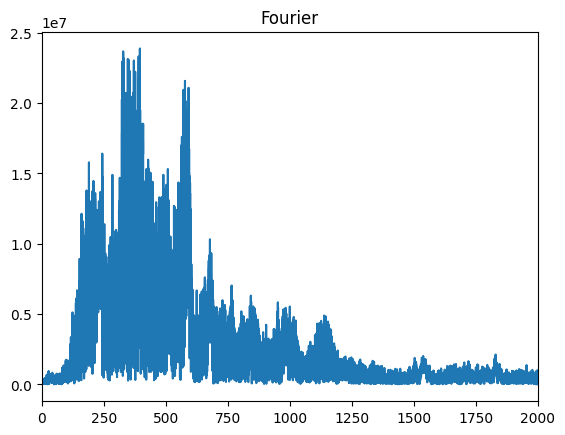

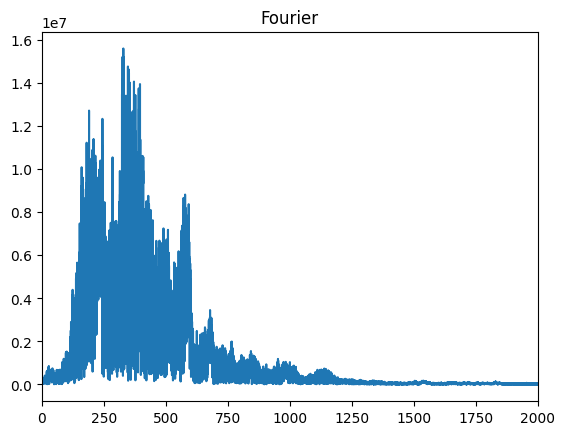

In [4]:
s = signalMeu() 
xf, yf = s.calcFFT(signal, 44100)
xf_filtered, yf_filtered = s.calcFFT(filtered_signal, 44100)
s.plotFFT(signal, 44100)
s.plotFFT(filtered_signal, 44100)

In [5]:
wavfile.write("lessThan4000.wav", 44100,np.array(filtered_signal))

In [6]:
# Portadora (carrier)

time = 9 # seconds
fc = 14000
carrierAmplitude = 1
sample_rate = 44100

n_measurements = 44100*time

time_vector = np.linspace(0, time, n_measurements)

carrier_vector = []
for t in time_vector:
    carrier_vector.append(carrierAmplitude*math.sin(2*math.pi*fc*t))

In [7]:
AM_signal = []
contador = 0
for point in carrier_vector:
    AM_signal.append(point+point*signal[contador])
    contador+=1

In [8]:
wavfile.write("AMsignal.wav", 44100,np.array(AM_signal))

In [9]:
maximum = max(AM_signal)
minimum = min(AM_signal)
print(maximum, minimum)

k = 1/maximum

normalized_AM = [point*k for point in AM_signal]
wavfile.write("normalizedAM.wav", 44100,np.array(normalized_AM))

22315.652877053784 -21376.70533685903


In [10]:
# ------------------------ RECEBIMENTO DO SINAL -----------------

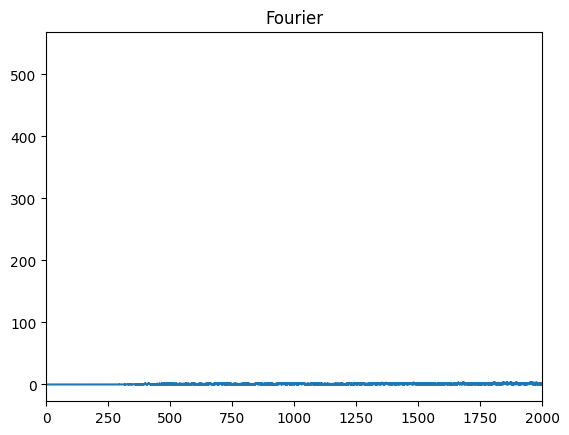

In [11]:
s = signalMeu() 
xf, yf = s.calcFFT(normalized_AM, 44100)
s.plotFFT(normalized_AM, 44100)

In [12]:
index = peakutils.indexes(yf, thres=0.4, min_dist=20)
print(f"Frequências de Pico: {[xf[i] for i in index]}")

Frequências de Pico: [13321.844907255769, 13399.62307696184, 13404.067543802186, 13407.95645228749, 13411.512025759766, 13415.512045916079, 13418.067614349278, 13422.512081189625, 13426.067654661903, 13428.623223095103, 13433.06768993545, 13436.734375078735, 13443.623298681274, 13448.734435547673, 13455.62335915021, 13459.401155964504, 13463.401176120817, 13466.845637922086, 13470.845658078399, 13477.179023325893, 13481.179043482205, 13488.734637110794, 13491.623540557019, 13494.845779016272, 13497.290235778462, 13499.845804211662, 13502.956930999904, 13506.734727814199, 13509.623631260425, 13512.734758048668, 13516.179219849937, 13518.512564941118, 13521.957026742388, 13525.957046898699, 13528.290391989882, 13532.068188804176, 13535.95709728948, 13538.623777393688, 13541.068234155879, 13545.734924338243, 13548.623827784468, 13552.62384794078, 13556.84609143911, 13561.512781621474, 13565.735025119804, 13568.068370210985, 13570.957273657212, 13573.846177103436, 13578.068420601767, 13582

In [13]:
s = []
contador = 0
for t in normalized_AM:
    s.append(t*carrier_vector[contador])
    contador+=1



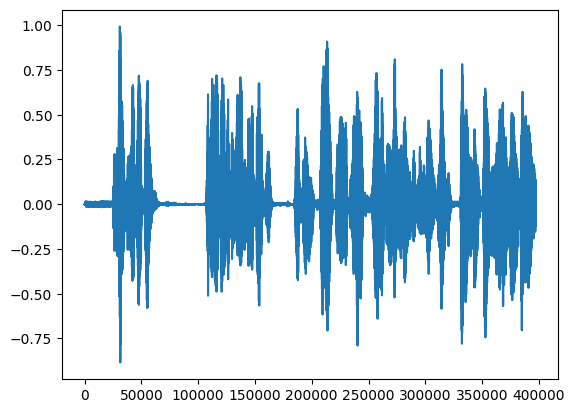

In [14]:
plt.plot(s)

In [15]:
wavfile.write("FINAL.wav", 44100,np.array(s))

In [16]:
a = 0.002212
b = 0.002113
c = 1
d = -1.868
e = 0.8728

filtered_signal = []
filtered_signal.append(signal[0])
filtered_signal.append(signal[1])
for index in range(len(s)):
    if index>1:
        filtered_signal.append(-d*filtered_signal[index-1]-e*filtered_signal[index-2]+a*s[index-1]+b*s[index-2])
        
        

In [17]:
wavfile.write("FINALFINAL.wav", 44100,np.array(filtered_signal))